In [18]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

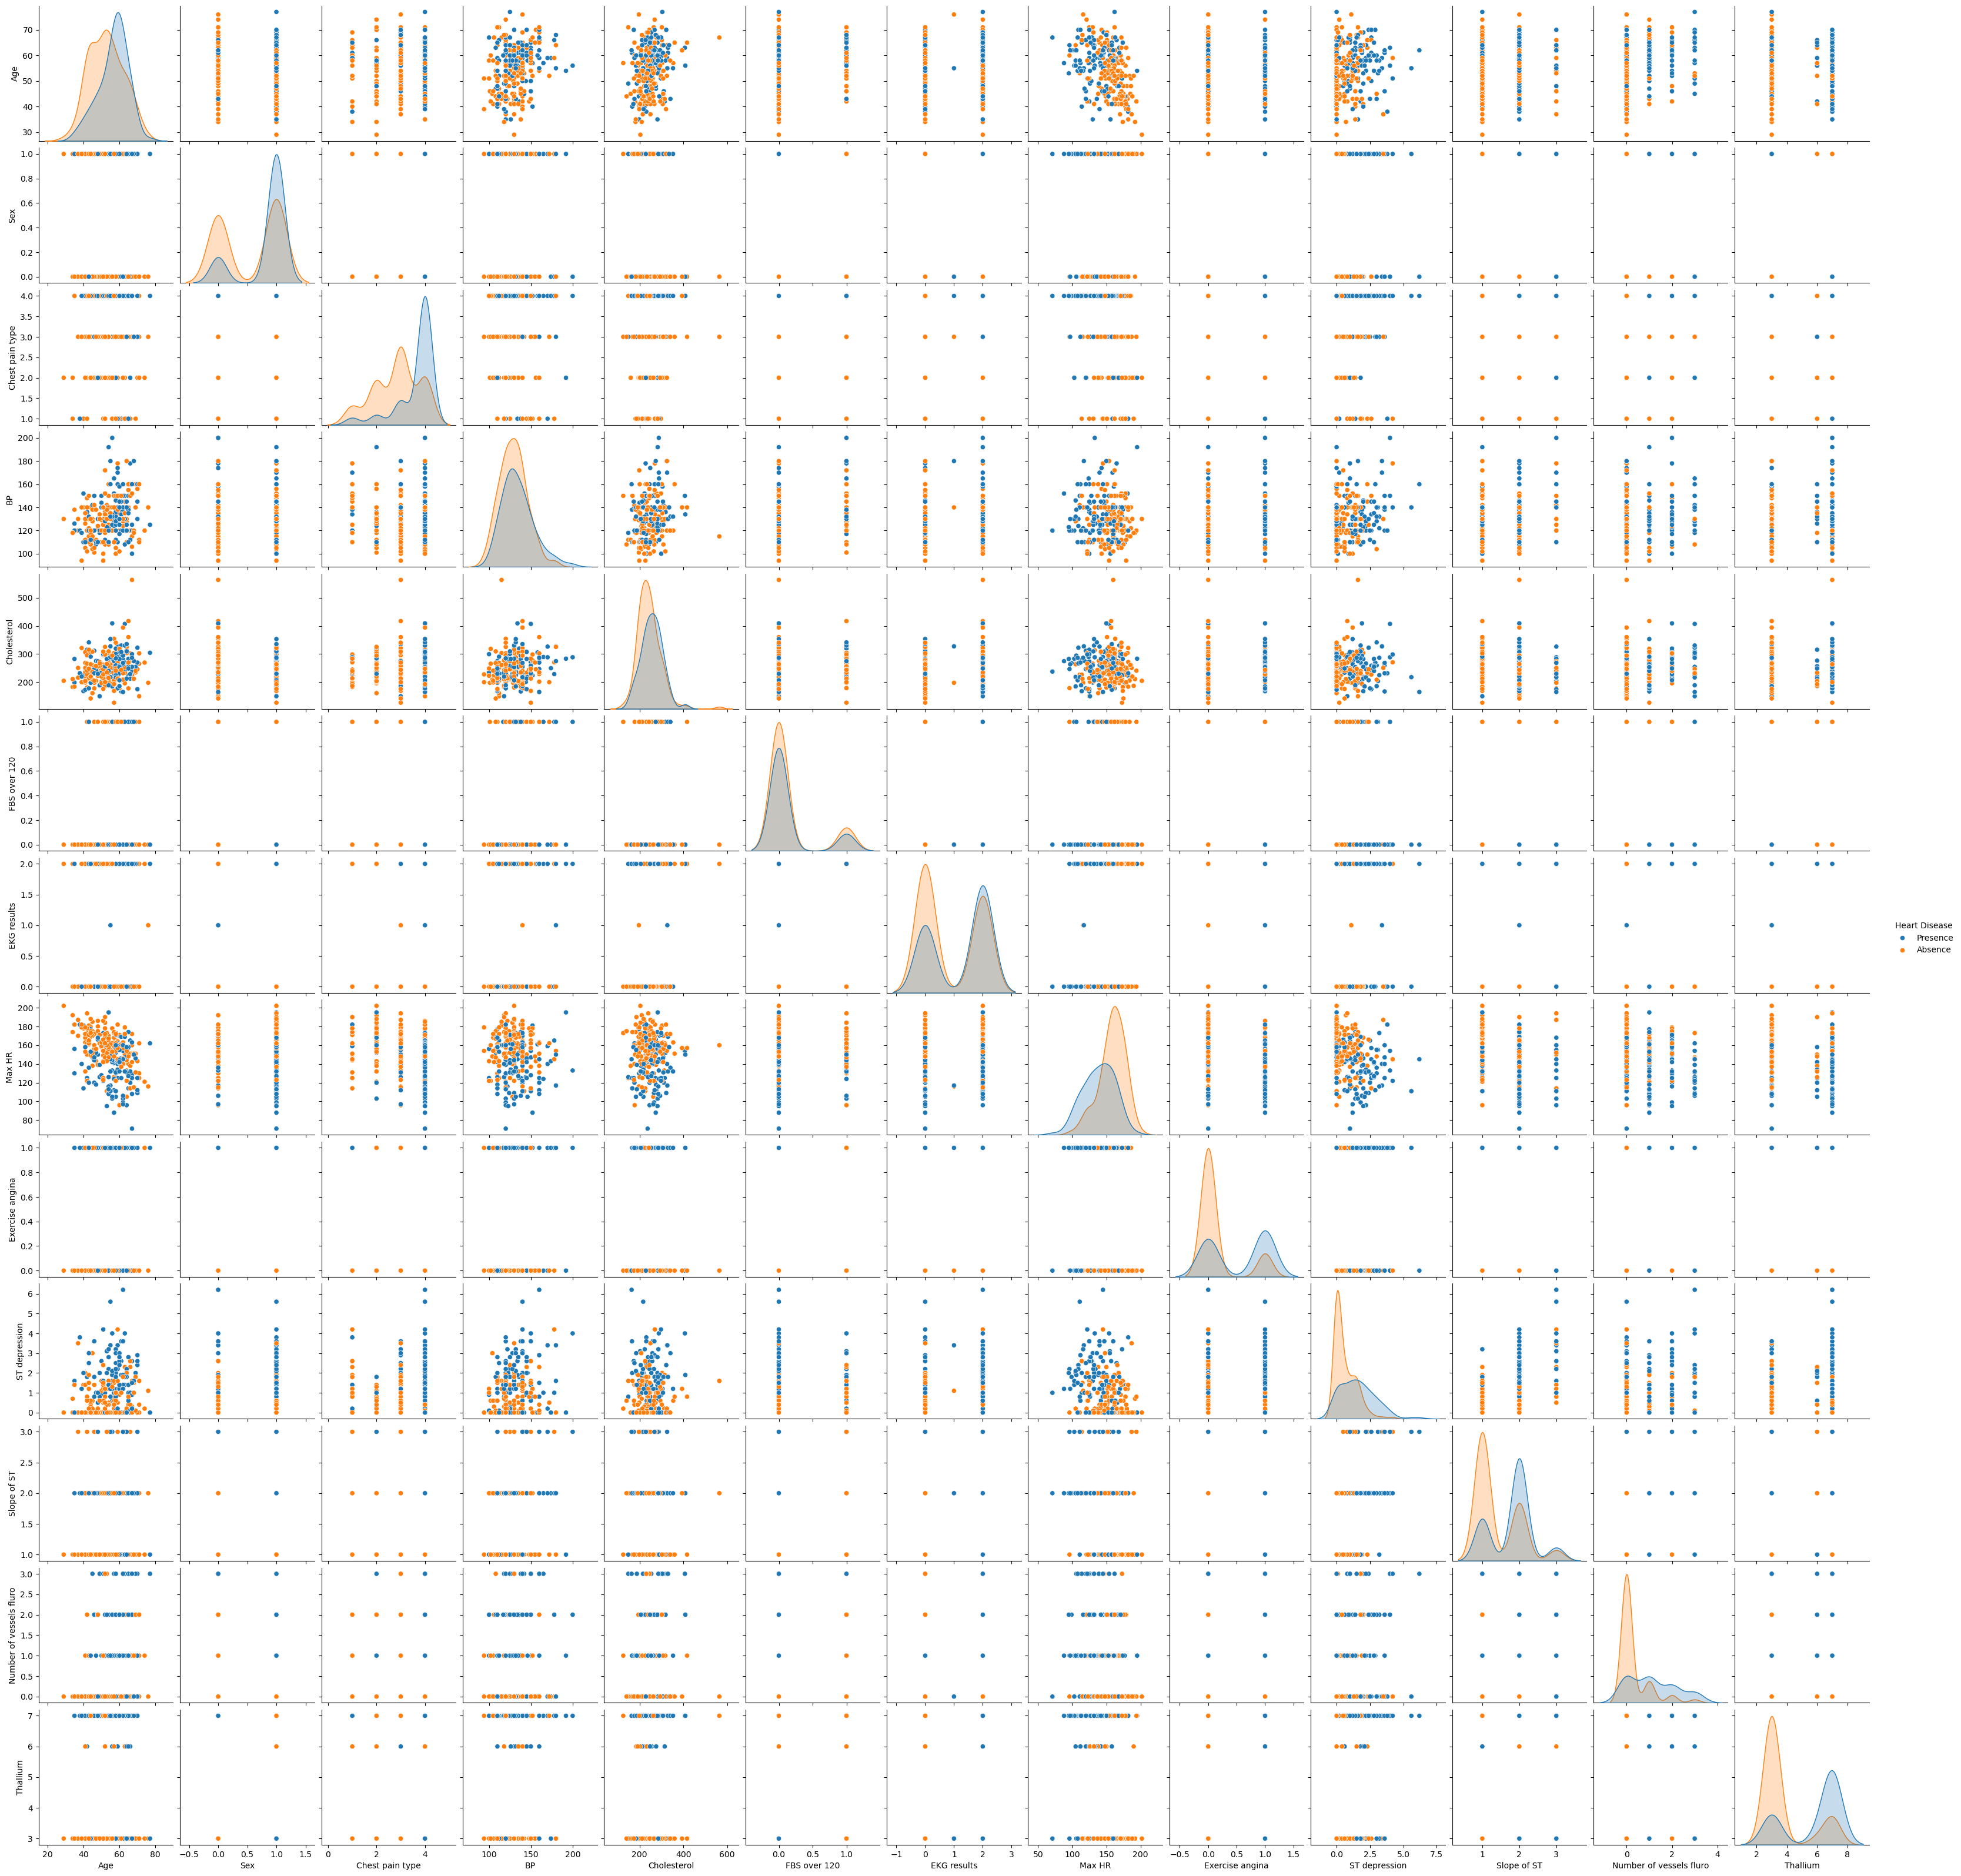

In [9]:
sns.pairplot(df, hue = 'Heart Disease')

<Axes: >

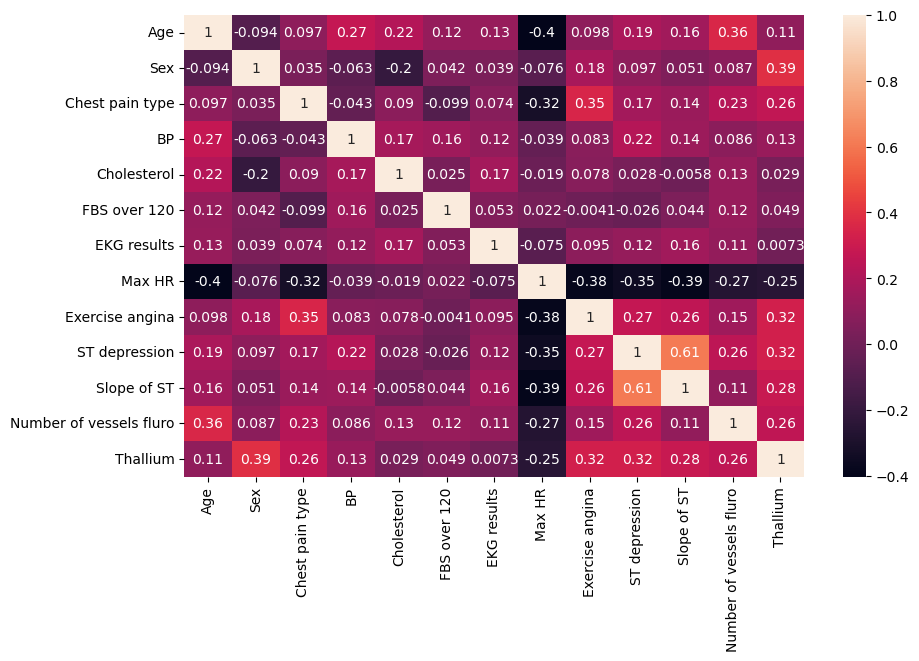

In [28]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Heart Disease', axis = 1)

In [12]:
y = df['Heart Disease']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
predictions = lr.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
print(confusion_matrix(y_test, predictions))

[[46  3]
 [ 8 24]]


In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     Absence       0.85      0.94      0.89        49
    Presence       0.89      0.75      0.81        32

    accuracy                           0.86        81
   macro avg       0.87      0.84      0.85        81
weighted avg       0.87      0.86      0.86        81



In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [46]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
knn_pred = knn.predict(X_test)

In [48]:
print(confusion_matrix(y_test, knn_pred))

[[30 19]
 [14 18]]


In [49]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

     Absence       0.68      0.61      0.65        49
    Presence       0.49      0.56      0.52        32

    accuracy                           0.59        81
   macro avg       0.58      0.59      0.58        81
weighted avg       0.60      0.59      0.60        81



In [50]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

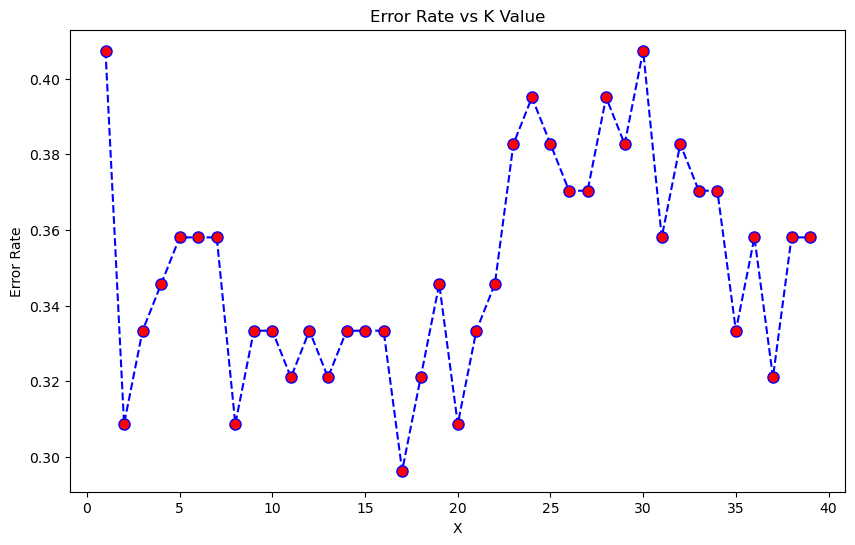

In [51]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Error Rate vs K Value')
plt.xlabel('X')
plt.ylabel('Error Rate')

In [52]:
knn = KNeighborsClassifier(n_neighbors = 17)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [54]:
predictions = knn.predict(X_test)

In [55]:
print(confusion_matrix(y_test, predictions))

[[37 12]
 [12 20]]


In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     Absence       0.76      0.76      0.76        49
    Presence       0.62      0.62      0.62        32

    accuracy                           0.70        81
   macro avg       0.69      0.69      0.69        81
weighted avg       0.70      0.70      0.70        81

